<h1><center style="color:purple;">South African Language Identification Hack 2022</center></h1>
<h3><center>By: Isichei, Nnamdi Augustus</center></h3>
<h3><center>Date: Saturday 25th June, 2022</center></h3>

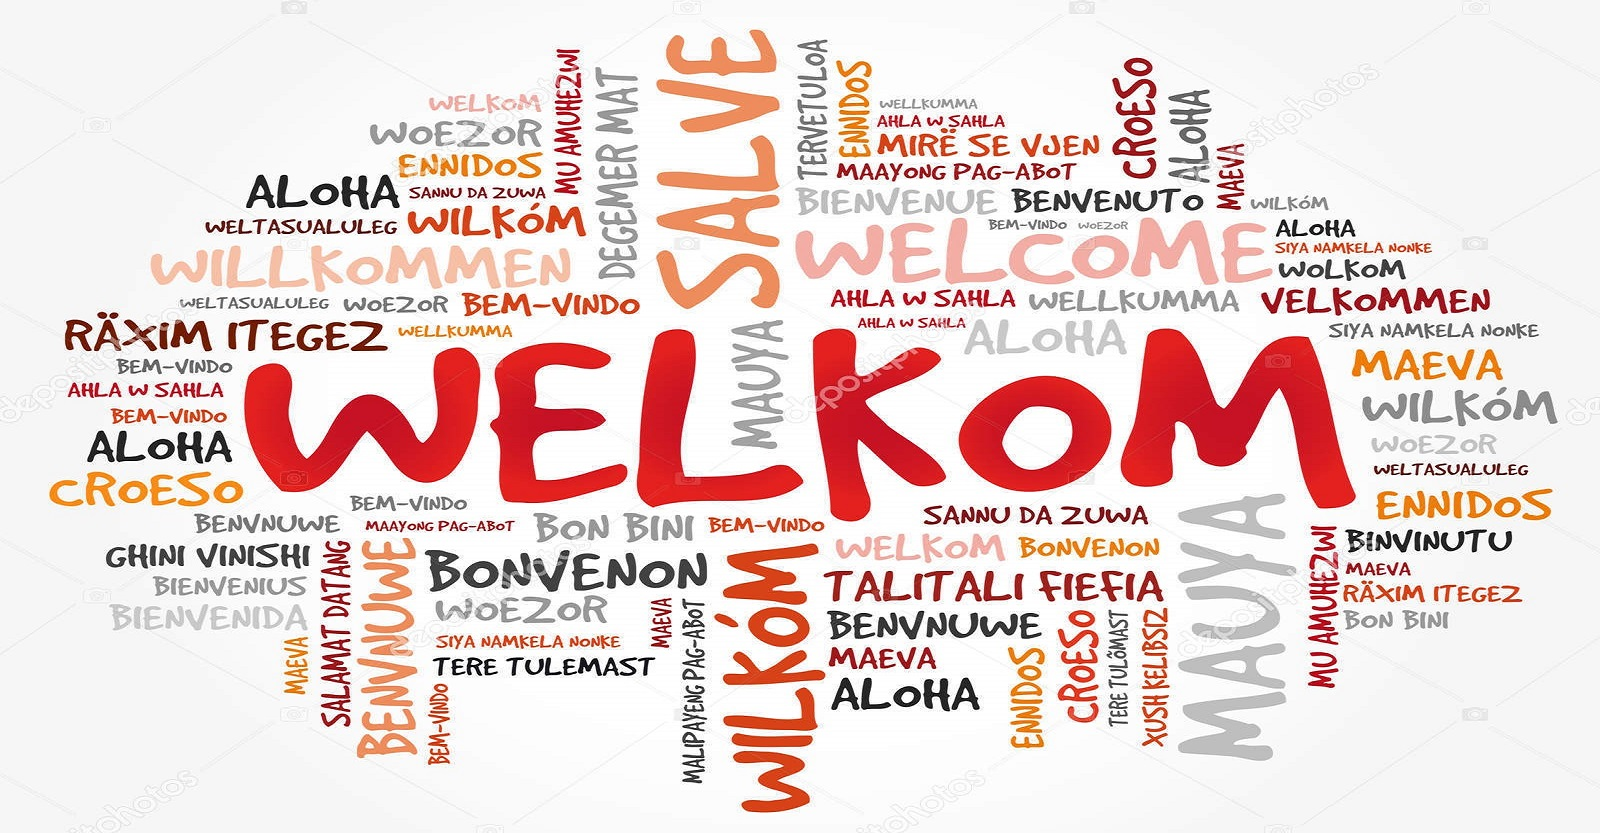

### Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Importing Libraries](#importing_libraries) <br>
    1.2. [Data Description](#data) <br>
    1.3. [Loading Datasets](#loading_data) <br><br>
    
2. [Exploratory Data Analysis](#EDA) <br>
    2.1 [Creating WordCloud](#wordcloud) <br><br>
    
3. [Data Preprocessing and Engineering](#preprocessing_and_engineering) <br>
    3.1 [Data Preprocessing](#preprocessing) <br>
    <font color=white>.....</font>3.1.1. [Removing Punctuations and Numbers](#punctuations) <br>
    <font color=white>.....</font>3.1.2. [Lemmatization](#punctuations) <br>
    3.2 [Data Engineering](#engineering) <br>
    <font color=white>.....</font>3.2.1. [Pipeline Creation](#pipeline) <br><br>

4. [Model Development](#model) <br>
    4.1 [Data Preparation](#data_prep) <br>
    4.2 [Model Training](#modeltraining) <br>
     <font color=white>.....</font>4.2.1. [Logistic Regression](#logisticregression) <br>
     <font color=white>.....</font>4.2.2. [LinearSVC](#linearsvc) <br>
     <font color=white>.....</font>4.2.3. [Radial Basis Function Kernel](#rbfsvc) <br>
     <font color=white>.....</font>4.2.4. [Naive Bayes](#naivebayes) <br>
     <font color=white>.....</font>4.2.5. [XGBoost Classifier](#xgboost) <br>
    4.3 [Model Evaluation](#evaluation) <br><br>
     
    
5. [Conclusion](#conclusion_and_recommendation) <br>


6. [Submission to Kaggle](#references) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### 1.1 Importing Libraries<a id="importing_libraries"></a>
[Table of Contents](#contents)

In [222]:
# Data structure libraries
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import string


#Model packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample
import xgboost as xgb


#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

### 1.2 Data Description<a id="data"></a>
[Table of Contents](#contents)

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**Language IDs**

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

### 1.3 Loading Dataset<a id="loading_data"></a>
[Table of Contents](#contents)

Let's start by loading the provided train and test sets for this language classification problem using the well-known Pandas package. The data will be read into this environment as a comma-separated value (csv) file, in order to prevent any changes to the original data, duplicates of the train and test datasets will be made.

In [148]:
# Reading in the data using Pandas Read CSV method.
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [149]:
# Make a copy of the train and test data note to alter the orginal dataset.
train = df_train.copy()
test = df_test.copy()

In [150]:
# Displaying the first 10 rows of the train data to see how it looks like.
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [151]:
# Displaying the first 10 rows of the test data to see how it looks like.
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 2. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

After reading in the train and test datasets, let's undertake some exploratory data analysis to better understand our data and get some guidance on how to carry out data preprocessing and engineering.

To comprehend how many rows and features are there in the provided dataset, I'd first like to know the shape of my train and test datasets.

In [114]:
print('The shape of the train data is {} while the test has {} shape.'.format(train.shape, test.shape))

The shape of the train data is (33000, 2) while the test has (5682, 2) shape.


From the shapes of the train and test datasets above, it is readily visible that the train dataset has 33,000 records and two features, although the test dataset provided an output of (5682, 2) for its shape, it means that there are 5,682 records and only one feature as we can see in the table above where the other column includes the index of each record.

**Checking for missing values**

To determine the best strategy to fill in any missing values that may exist, I would like to see if there are any in the train and test datasets.

In [152]:
# Checking for missing values in the train data
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [153]:
# Checking for missing values in the test data
test.isnull().sum()

index    0
text     0
dtype: int64

I don't have to worry about filling in the missing values because it is clear from the outputs above that there are no missing values in either the train or test data set.

**Checking the Unique Records in the Datasets**

In [154]:
# Unique lang_id and text of the train dataset
unique_lang_id = train['lang_id'].unique()
unique_train_text = train['text'].unique()

# Unique text of the test dataset
unique_test_text = test['text'].unique()

In [155]:
print(
      """The number of unique records in the train and test dataset an given below:
1. Unique lang_id = {}
2. Number of lang_id = {}
3. Number of unique train text = {}
4. Number of unique test text = {}"""
.format(list(unique_lang_id), len(unique_lang_id), len(unique_train_text), len(unique_test_text)))

The number of unique records in the train and test dataset an given below:
1. Unique lang_id = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
2. Number of lang_id = 11
3. Number of unique train text = 29948
4. Number of unique test text = 5459


This output confirms that the data set contains the number of unique South African languages listed in the data description section. Remember that the train and test datasets have the shapes (33000, 2) and (5682, 2) respectively in the output above. It is obvious from the output that the train and test datasets contain some duplicate records, which we will remove because they are likely to have an impact on the performance of our model when we start the model training.

**Checking for the distribution of the languages in the dataset**

In [156]:
train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

The dataset's languages are clearly evenly distributed, although we have already noted several duplicate records that will be removed later. This decrease in duplicate records could lead to a dataset imbalance and an uneven distribution of languages. If the imbalance is so extreme, we might choose to use certain resampling strategies before training our model.

**Dropping Duplicate Rows in the Train Dataset**

In [157]:
# Dropping the duplicate records using the pd.drop_duplicates method
train_drop = train.drop_duplicates()
train_drop.shape

(29948, 2)

Now that the duplicate records have been dropped, let's see the new language distribution we have in the dataset.

In [158]:
train_drop['lang_id'].value_counts()

eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: lang_id, dtype: int64

**Let's create a chart for the distribution**

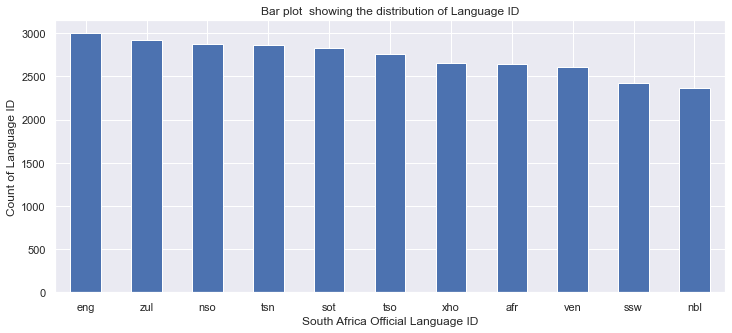

In [159]:
train_drop['lang_id'].value_counts().plot(kind='bar', figsize=(12, 5))
plt.title('Bar plot  showing the distribution of Language ID')
plt.ylabel('Count of Language ID')
plt.xlabel('South Africa Official Language ID')
plt.xticks(rotation=0)
plt.show()

According to the bar graph above, out of the 11 official South African languages represented in the dataset, English was used the most frequently while isiNdebele was used the least.

### 2.1 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

In addition to the EDA performed above, I am curious to see the terms that are frequently used when writing in the several South African official languages; as a result, in this section, I will create a wordcloud that will display some of the interesting words.

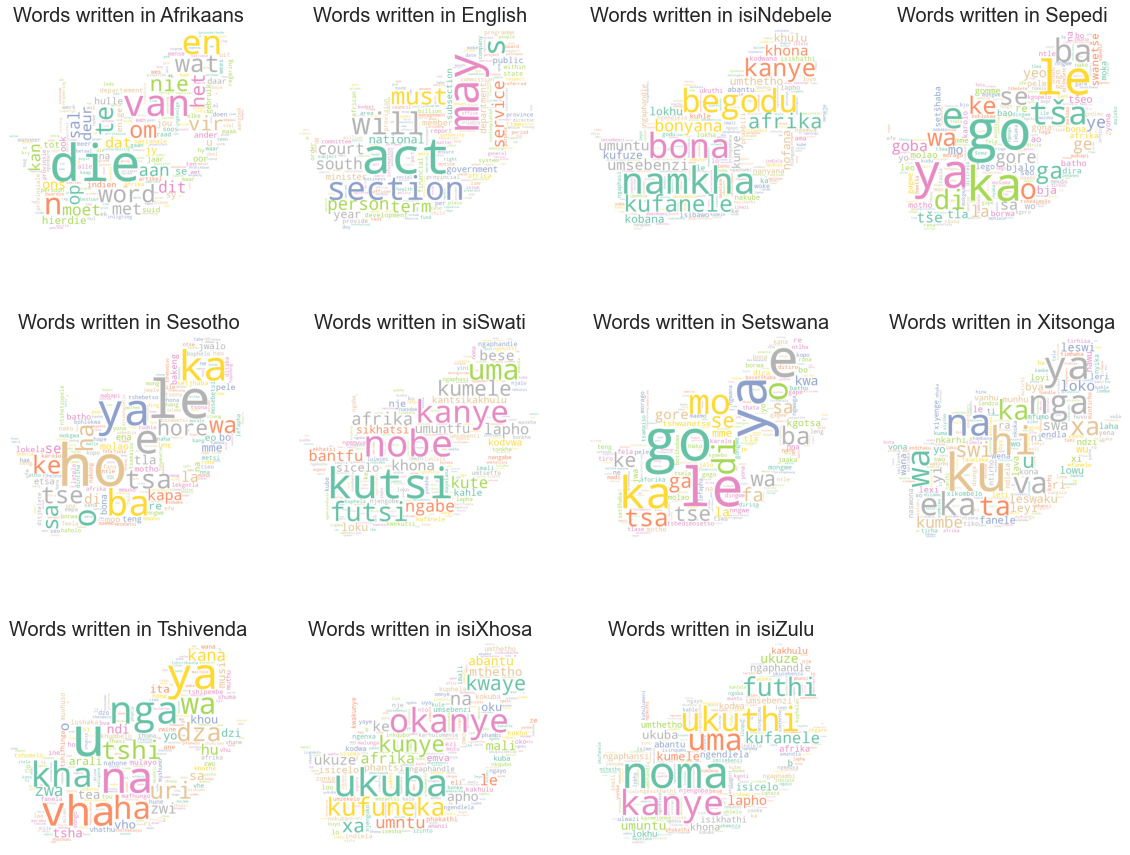

In [174]:
# Generate wordcloud
# initialize news, pro, neutral and anti messages
lang_id = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

afr = train_drop[train_drop['lang_id'] == 'afr']['text']
eng = train_drop[train_drop['lang_id'] == 'eng']['text']
nbl = train_drop[train_drop['lang_id'] == 'nbl']['text']
nso = train_drop[train_drop['lang_id'] == 'nso']['text']
sot = train_drop[train_drop['lang_id'] == 'sot']['text']
ssw = train_drop[train_drop['lang_id'] == 'ssw']['text']
tsn = train_drop[train_drop['lang_id'] == 'tsn']['text']
tso = train_drop[train_drop['lang_id'] == 'tso']['text']
ven = train_drop[train_drop['lang_id'] == 'ven']['text']
xho = train_drop[train_drop['lang_id'] == 'xho']['text']
zul = train_drop[train_drop['lang_id'] == 'zul']['text']


afr = [word for line in afr for word in line.split()]
eng = [word for line in eng for word in line.split()]
nbl = [word for line in nbl for word in line.split()]
nso = [word for line in nso for word in line.split()]
sot = [word for line in sot for word in line.split()]
ssw = [word for line in ssw for word in line.split()]
tsn = [word for line in tsn for word in line.split()]
tso = [word for line in tso for word in line.split()]
ven = [word for line in ven for word in line.split()]
xho = [word for line in xho for word in line.split()]
zul = [word for line in zul for word in line.split()]

    
# Define a function to plot word cloud
def plot_cloud(afr, eng, nbl, nso, sot, ssw, tsn, tso, ven, xho, zul):
    # Import image to np.array
    #mask = np.array(Image.open('comment.png'))
    mask1 = np.array(Image.open('samap.png'))
    
    afr = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(afr))
    
    eng = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(eng))
    
    nbl = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(nbl))
    
    nso = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(nso))
    
    sot = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(sot))
    
    ssw = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(ssw))
    
    tsn = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(tsn))
    
    tso = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(tso))
    
    ven = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(ven))
    
    xho = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(xho))
    
    zul = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(zul))

    
    # Set figure size
    plt.figure(figsize = (20,16))
    plt.subplot(3,4,1)
    plt.title('Words written in Afrikaans', fontsize = 20)
    # Display image
    plt.imshow(afr) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,2)
    plt.title('Words written in English', fontsize = 20)
    # Display image
    plt.imshow(eng) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,3)
    plt.title('Words written in isiNdebele', fontsize = 20)
    # Display image
    plt.imshow(nbl) 
    # No axis details
    plt.axis("off")

    plt.subplot(3,4,4)
    plt.title('Words written in Sepedi', fontsize = 20)
    # Display image
    plt.imshow(nso) 
    # No axis details
    plt.axis("off")
  
    plt.subplot(3,4,5)
    plt.title('Words written in Sesotho', fontsize = 20)
    # Display image
    plt.imshow(sot) 
    # No axis details
    plt.axis("off")
        
    plt.subplot(3,4,6)
    plt.title('Words written in siSwati', fontsize = 20)
    # Display image
    plt.imshow(ssw) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,7)
    plt.title('Words written in Setswana', fontsize = 20)
    # Display image
    plt.imshow(tsn) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,8)
    plt.title('Words written in Xitsonga', fontsize = 20)
    # Display image
    plt.imshow(tso) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,9)
    plt.title('Words written in Tshivenda', fontsize = 20)
    # Display image
    plt.imshow(ven) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,10)
    plt.title('Words written in isiXhosa', fontsize = 20)
    # Display image
    plt.imshow(xho) 
    # No axis details
    plt.axis("off")
    
    plt.subplot(3,4,11)
    plt.title('Words written in isiZulu', fontsize = 20)
    # Display image
    plt.imshow(zul) 
    # No axis details
    plt.axis("off")
    

plot_cloud(afr, eng, nbl, nso, sot, ssw, tsn, tso, ven, xho, zul)

The most often used terms in each language are printed out as the largest text in the wordcloud above, while the words that occurred the least were very small. For instance, the most frequently used word in English is **"act"**, the most frequently used word in Afrikaans is **"die"**, and the most frequently used word in isiZulu is **"noma"**.

You may easily determine the most frequently used words in each of South Africa's official languages by carefully examining each word cloud.

## 3. Data Preprocessing and Engineering<a id="preprocessing_and_engineering"></a>
[Table of Contents](#contents)

I will now undertake some data engineering and preprocessing, which will involve removing punctuation, numbers, and special characters as well as using a tokenizer and lemmatizer. All of these procedures should improve the data so that it is better prepared to be input into the model for training.

### 3.1 Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

#### 3.1.1 Removing Punctuations and Numbers<a id="punctuations"></a>
[Table of Contents](#contents)

I'll make two distinct functions called `remove punctuation()` and `remove digit()` to get rid of punctuation and numbers. To eliminate any punctuation and/or digits that can hurt the performance of the model I'm about to train, these functions will be applied to the text feature of the train and test datasets.

In [175]:
# Defining the remove punctuation function
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

# Defining the remove digit function
def remove_digit(text):
    return ''.join([i for i in text if not i.isdigit()])

Now, let's apply the functions defined above to our train and test dataset as follows:

In [176]:
# Applying the remove_punctuation and remove_digit to the train_drop data
train_drop['text'] = train_drop['text'].apply(remove_punctuation, remove_digit)

# Applying the remove_punctuation and remove_digit to the test data
test['text'] = test['text'].apply(remove_punctuation, remove_digit)

#### 3.1.2 Lemmatization<a id="pipeline"></a>
[Table of Contents](#contents)

Now it's time to define a function that will tokenize and lemmatize our data. Tokenization actually breaks a raw text into words and sentences called tokens, these tokens will then be lemmatized which means that each token will be converted to its base form. 

The function that is to be defined below will be applied in section 4, subsection 4.1 - Data preparation.

In [177]:
# Defining the function that will perform tokenization and lemmatization
def token_lemmatizer(df):
    # Instantiating TreebankWorldTokenizer
    tokeniser = TreebankWordTokenizer()
    tokens = tokeniser.tokenize(df)

    # define lemmatiser
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in tokens]
   
    return ' '.join([x for x in lem])

### 3.2 Data Engineering<a id="engineering"></a>
[Table of Contents](#contents)

For easy workflow, I have decided to create a pipeline under the model training subsection [4.2](#modeltraining). The pipeline will perform some data engineering with the `CountVectorizer` and `TfidfTransformer` packages. See the next section below [3.2.1](#pipeline) for more explanation of the features that will be captured in pipeline.

#### 3.2.1 Pipeline Creation<a id="pipeline"></a>
[Table of Contents](#contents)

The end-to-end structure that orchestrates the flow of data into and output from a machine learning model is known as a machine learning pipeline (or set of multiple models). It covers the input of the raw data, the features, the outputs, the machine learning model and model parameters, and the outputs of the predictions<sup>1</sup>.

The following are the features that will be captured in the pipeline:
- CountVectorizer
- TfidfTransformer
- Model

**Count Vectorizer**: By performing preprocessing tasks like converting all words to lowercase and removing special characters, CountVectorizer refers to the process of breaking down a sentence or any text into words<sup>2</sup>.

**TfidfTransformer**: The terms "Tf" and "tf-idf" stand for term frequency and inverse document frequency, respectively. This word weighting technique is widely used in information retrieval and is very effective in document classification<sup>3</sup>.

## 4. Model Development<a id="model"></a>
[Table of Contents](#contents)

Alright! We have reached the section on model development, which was much anticipated. We will create and train a language classification model using a variety of algorithms in this section, including:

1. Logistic Regression
2. LinearSVC
3. Radial Basis Function Kernel
4. Multinomial Naive Bayes and
5. XGBoost Classifier

The various models trained with the aforementioned algorithms will be evaluated using the classification report metrics, which include the precision, recall, f1, and accuracy scores. The best performing model will be taken into consideration and used to participate in the ongoing Kaggle challenge, after which the model will be prepared and presented for deployment.

### 4.1 Data Preparation<a id="data_prep"></a>
[Table of Contents](#contents)

To start, let's prepare our data by dividing it into X train, X test, and y train. These datasets will be utilized toward the end of the entire model training to prepare my Kaggle submission, but as the model training process progresses, the X train and y train will also be divided into the train test set for training and validation.

In [228]:
# Creating the training and test datasets.
X = train_drop['text']
y = train_drop['lang_id']
X_test_data = test['text']

In [207]:
# Applying the token_lemmatizer function defined above in section 3.1.2 to the train and test datasets.
X = X.apply(token_lemmatizer)
X_test_data = X_test_data.apply(token_lemmatizer)

### 4.2 Model Training<a id="modeltraining"></a>
[Table of Contents](#contents)

Let's use the `train_test_split` function from `sklearn` package to split our train data into train and test for validation and cross validation purpose.

In [186]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [187]:
# Create a function for the train model pipeline 
def train_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vect', CountVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

#### 4.2.1 Logistic Regression<a id="logisticregression"></a>
[Table of Contents](#contents)

In [188]:
# Instantiating the Logistic Regression model with default parameters
lr = LogisticRegression()

# Calling my train model function
train_model(lr, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       596
         nbl       1.00      0.96      0.98       463
         nso       0.99      1.00      1.00       547
         sot       1.00      0.99      1.00       567
         ssw       1.00      0.98      0.99       508
         tsn       0.99      1.00      1.00       578
         tso       1.00      1.00      1.00       542
         ven       1.00      1.00      1.00       528
         xho       0.99      0.99      0.99       507
         zul       0.96      0.99      0.97       567

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



#### 4.2.2 LinearSVC<a id="linearsvc"></a>
[Table of Contents](#contents)

In [189]:
# Instantiating the Support Vector Classifier with Linear Kernel
svc_linear = svm.SVC(kernel='linear')

# Calling my train model function
train_model(svc_linear, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       596
         nbl       0.99      0.97      0.98       463
         nso       1.00      1.00      1.00       547
         sot       1.00      1.00      1.00       567
         ssw       1.00      0.99      0.99       508
         tsn       1.00      1.00      1.00       578
         tso       1.00      1.00      1.00       542
         ven       1.00      1.00      1.00       528
         xho       0.99      1.00      0.99       507
         zul       0.97      0.99      0.98       567

    accuracy                           1.00      5990
   macro avg       1.00      0.99      0.99      5990
weighted avg       1.00      1.00      1.00      5990



#### 4.2.3 Radial Basis Function Kernel<a id="rbfsvc"></a>
[Table of Contents](#contents)

In [190]:
# Instantiating the Support Vector Classifier with Radial Basis Function Kernel
svc_rbf = svm.SVC(kernel='rbf')       

# Calling my train model function
train_model(svc_rbf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       596
         nbl       0.99      0.96      0.98       463
         nso       1.00      1.00      1.00       547
         sot       1.00      1.00      1.00       567
         ssw       1.00      0.98      0.99       508
         tsn       1.00      1.00      1.00       578
         tso       1.00      1.00      1.00       542
         ven       1.00      1.00      1.00       528
         xho       0.99      1.00      0.99       507
         zul       0.96      0.99      0.97       567

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



#### 4.2.4 Naive Bayes<a id="naivebayes"></a>
[Table of Contents](#contents)

In [191]:
# Instantiating Multinomial Naive Bayes with default parameters      
naive = MultinomialNB()               

# Calling my train model function
train_model(svc_rbf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       596
         nbl       0.99      0.96      0.98       463
         nso       1.00      1.00      1.00       547
         sot       1.00      1.00      1.00       567
         ssw       1.00      0.98      0.99       508
         tsn       1.00      1.00      1.00       578
         tso       1.00      1.00      1.00       542
         ven       1.00      1.00      1.00       528
         xho       0.99      1.00      0.99       507
         zul       0.96      0.99      0.97       567

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



#### 4.2.5 XGBoost Classifier<a id="xgboost"></a>
[Table of Contents](#contents)

In [192]:
# Instantiating XGBoost classifier with default parameters
xg = xgb.XGBClassifier()       

# Calling my train model function
train_model(xg, X_train, X_test, y_train, y_test)

[15:05:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.90      1.00      0.95       596
         nbl       0.95      0.91      0.93       463
         nso       0.99      0.99      0.99       547
         sot       1.00      0.97      0.98       567
         ssw       0.98      0.90      0.94       508
         tsn       0.97      0.99      0.98       578
         tso       0.99      1.00      1.00       542
         ven       1.00      1.00      1.00       528
         xho       0.97      0.91      0.94       507
         zul       0.89      0.92      0.90       567

    accuracy                           0.96      5990
   mac

### 4.3 Model Evaluation<a id="evaluation"></a>
[Table of Contents](#contents)

We will now assess our models by carefully examining the various metrics that were calculated for each model above. We have already produced the categorization reports for each training model, which include various metrics that will be briefly explained below.

- **Precision:** Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall:** Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score:** A combination (harmonic mean) of precission and recall. A perfect model achieves an F1 score of 1.0.
- **Support:** The number of samples each metric was calculated on.
- **Accuracy:** The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg:** Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into account so if you do have class imbalances, pay attention to this metric.
- **Weighted avg:** Short for weighted average, the weighted average of precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are there in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

**Accuracy scores**

In order to visualize and compare the model performance based on the accuracy score of each model, I will compile a dictionary of all the accuracy scores and create a bar plot.

In [242]:
# Create a dictionary contaning all accuracy scores from our trained models
dict_accuracy = {'Models': ['Logistic Regression', 'Linear SVC', 'RBE SVC', 'Naive Bayes', 'XGBoost Classifier'],
                 'Accuracy Scores': [0.99, 1.00, 0.99, 0.99, 0.96 ]}

# Converting the dictionary into a pandas dataframe 
df_dict_accuracy = pd.DataFrame(dict_accuracy)


# Display the table containg all accuracy scores for each model and sampling technique
df_dict_accuracy

,Models,Accuracy Scores
0,Logistic Regression,0.99
1,Linear SVC,1.00
2,RBE SVC,0.99
3,Naive Bayes,0.99
4,XGBoost Classifier,0.96


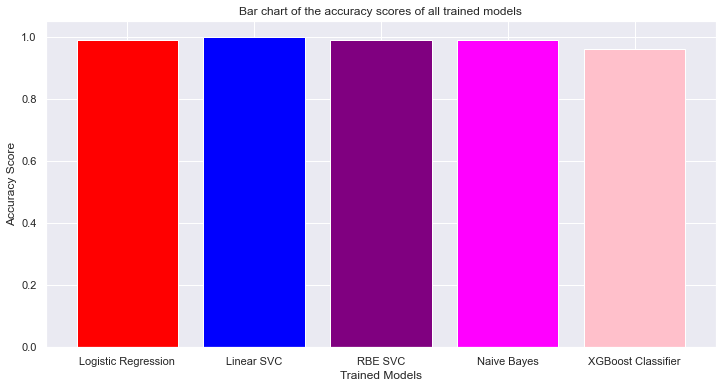

In [250]:
# Plotting the chart of the accuracy scores for all trained models
plt.figure(figsize=(12, 6))
plt.bar(x=df_dict_accuracy['Models'], height=df_dict_accuracy['Accuracy Scores'], 
        data=df_dict_accuracy, color = ['red', 'blue', 'purple', 'magenta', 'pink'])
#plt.legend(['Logistic Regression', 'Linear SVC', 'RBE SVC', 'Naive Bayes', 'XGBoost Classifier'])
plt.title('Bar chart of the accuracy scores of all trained models')
plt.xlabel('Trained Models')
plt.ylabel('Accuracy Score')
plt.show()

Let's discuss about the models' accuracy. The Linear SVC model appears to have the highest accuracy of 1.0, according to the accuracy scores table and the charts above. This means that the model performed amazingly well on the train data, but it is clear that this score is largely the result of overfitting because the model performed poorly when given unseen data.

The accuracy score for three models, Logistic Regression, RBE SVC, and MultinomailNB, is 0.99. In comparison to the other two models, MultinomialNB fared the best because the gap between its test accuracy and train accuracy is the smallest. The model after MultinomialNB with a somewhat higher test accuracy rating is logistic regression.

The XGBoost classifier is the worst of the entire trained model because it did poorly in terms of its train and test accuracy scores.

## 5. Conclusion<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)

In order to train a model that can recognize the language of text in any of South Africa's 11 official languages, we set out to complete this challenge. To get it ready for the main task of generating models, the data supplied for this task underwent a number of data pretreatment processes. The model was trained using five different methods, and the Multinomial Naive Bayes approach ultimately produced the best model for the classification task.

The model had a training accuracy of 0.99 and a test accuracy of 0.95564 (according to my Kaggle score), which indicates that it can accurately classify text written in any of the official South African languages up to 95% of the time. This simply means  that the model can identify the precise language that a text is written in with up to 95% accuracy when you type it in any of the official South African languages.

In conclusion, this model should be tried out if you find yourself trying to identify the unique South African language that a certain text was written in because the likelihood that it will fail you is extremely low.

### Recommendation

I will recommend that this module be improved so that users can translate between South African languages, which will improve communication and promote greater nationalism among the country's citizens. This module currently only allows users to specify or identify the South African language that a text is written in.

## 6. Submission to Kaggle<a id="references"></a>
[Table of Contents](#contents)

Now that am ready to submit my prediction to Kaggle, there is a need to create a new pipleline that will accept the whole train dataset for training of the model and perform predictions with the given test data to generate the expected predictions which will be then be submitted to Kaggle.

In [232]:
# Creating pipeline to be used for submission to Kaggle
pipe = Pipeline([('vect', CountVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', naive)])

# Fitting the model
pipe.fit(X, y)

# Performing prediction
y_pred = pipe.predict(X_test_data)

In [233]:
# Preparing submission to Kaggle
submit = test.index + 1
Final_Table = {'index': submit, 'lang_id': y_pred}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['index', 'lang_id']]

# Saving submission as CSV file
submission.to_csv('my_submission_new_naive.csv', index=False)

### References

1. Machine Learning Pipeline: https://c3.ai/glossary/machine-learning/machine-learning-pipeline/#:~:text=A%20machine%20learning%20pipeline%20is,model%20parameters%2C%20and%20prediction%20outputs.

2. What Is CountVectorizer In NLP?: https://pianalytix.com/countvectorizer-in-nlp/#:~:text=CountVectorizer%20means%20breaking%20down%20a,data%20needs%20to%20be%20vectorized.

3. sklearn.feature_extraction.text.TfidfTransformer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html